<h1 style="color: blue;">바. 크롤링</h1>

**크롤링(Crawling)** 은 인터넷에서 웹 사이트를 방문하여 데이터를 수집하는 프로세스를 말합니다. 일반적으로 크롤러(Crawler) 또는 스파이더(Spider)라고 불리는 소프트웨어를 사용하여 자동으로 데이터를 수집합니다.

크롤링은 대개 웹 스크래핑(Web Scraping)과 관련이 있습니다. 웹 스크래핑은 인터넷에서 데이터를 수집하는 일반적인 용어이며, 크롤링은 이러한 웹 스크래핑 프로세스 중 하나입니다. 크롤링을 사용하여 데이터를 수집할 때는, 일반적으로 HTTP 요청을 보내고 HTML 페이지를 받아와서 파싱한 다음, 원하는 데이터를 추출합니다.

데이터 분석이나 연구 분야에서는 특정 이미지 특징을 분석하거나, 이미지를 학습 데이터로 사용하기 위해 수집할 수 있습니다.

<h2 style="color: green;">HTTP</h2>

HTTP (Hypertext Transfer Protocol)는 인터넷에서 데이터를 주고받을 수 있는 프로토콜 중 하나입니다.

웹 페이지나 이미지, 비디오 등 다양한 데이터를 주고받는 데 사용됩니다. 

HTTP는 클라이언트와 서버 간의 통신에 사용되며, 클라이언트는 HTTP 요청을 보내고, 서버는 HTTP 응답을 보내는 방식으로 통신합니다.

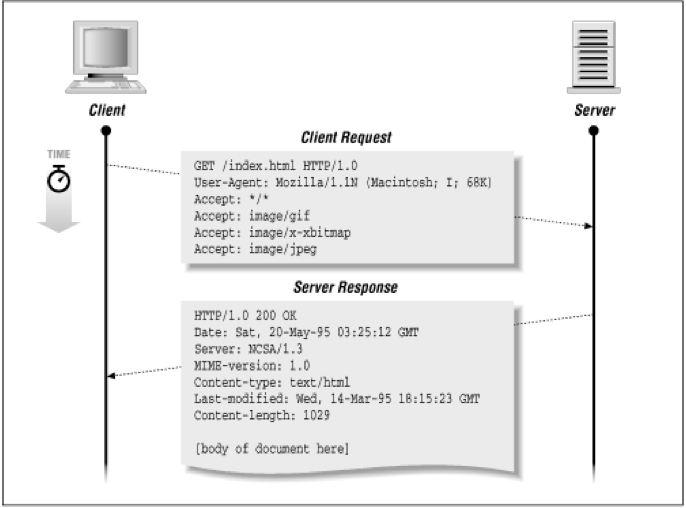

### *요청과 응답*

**HTTP 요청은 클라이언트에서 서버로 보내는 메시지입니다.**
이 메시지에는 요청 메서드(GET, POST, PUT, DELETE 등)와 요청 URI, 헤더, 바디 등이 포함됩니다. 
요청 메서드는 서버에서 수행해야 할 작업을 지정하며, 요청 URI는 요청하는 리소스의 경로를 나타냅니다.

**HTTP 응답은 서버에서 클라이언트로 보내는 메시지입니다.**
이 메시지에는 상태 코드, 헤더, 바디 등이 포함됩니다. 
상태 코드는 요청이 성공적으로 처리되었는지, 실패했는지 등의 정보를 나타내며, 헤더는 응답에 대한 부가적인 정보를 포함합니다.

즉, 요청은 클라이언트가 서버에게 데이터를 요청하는 것이고, 응답은 서버가 클라이언트에게 요청에 대한 결과를 보내는 것입니다. 

### *웹 프로토콜*

웹 프로토콜이란 인터넷에서 정보를 주고받는 데 사용되는 통신 규약(protocol)을 의미합니다. 웹 프로토콜은 웹 브라우저와 웹 서버 사이에서 이루어지는 통신을 정의합니다.

가장 일반적으로 사용되는 웹 프로토콜은 HTTP(Hypertext Transfer Protocol)입니다. HTTP는 웹 브라우저가 서버로 데이터를 요청하고, 서버가 웹 브라우저에게 해당 데이터를 전송하는 방법을 규정합니다. 
HTTP는 보통 TCP/IP 프로토콜을 사용하여 통신합니다.


<h2 style="color: green;">프레임워크 - Beautifulsoup</h2>

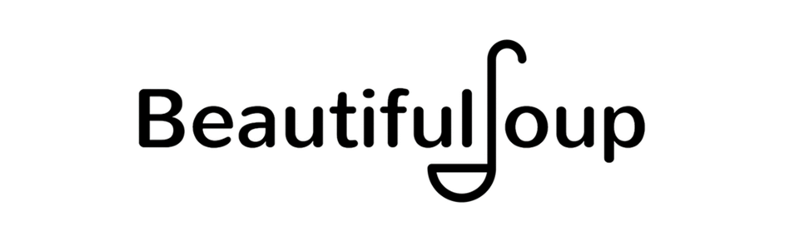

BeautifulSoup은 HTML과 XML 파일에서 데이터를 추출하기 위한 파이썬 라이브러리로, 특히 웹 크롤링에서 자주 사용됩니다. BeautifulSoup을 사용하면 HTML과 XML 문서를 파싱하여 원하는 데이터를 추출할 수 있습니다.


## *웹 크롤링 Requests, BeatifulSoup 라이브러리 사용해서 크롤링 해보기*

In [8]:
pip install beautifulsoup4==4.11.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.12.2
    Uninstalling beautifulsoup4-4.12.2:
      Successfully uninstalled beautifulsoup4-4.12.2
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install requests==2.28.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.29.0
    Uninstalling requests-2.29.0:
      Successfully uninstalled requests-2.29.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
from bs4 import BeautifulSoup
import os

#키워드
query = "사과"

url = f"https://www.google.com/search?q={query}&source=lnms&tbm=isch"

header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}

response = requests.get(url, headers=header)
#print(response.text)

soup = BeautifulSoup(response.text, "html.parser")
#print(soup)

img_tags = soup.find_all("img")
#print(img_tags)

urls_list = []

for img_tag in img_tags :
    try :
        urls_list.append(img_tag['src'])
    except KeyError :
        try :
            urls_list.append(img_tag['data-iurl'])
        except KeyError :
            pass
        
#print(len(urls_list))

#이미지 저장

os.makedirs("../data/apple", exist_ok=True)

for i, url in enumerate(urls_list) :
    print(i, url)
    
    try :
        img_data = requests.get(url, headers=header).content
        file_path = f"../data/apple/apple_{i}.png"
        with open(file_path, "wb") as f :
            f.write(img_data)
            
        if os.path.getsize(file_path) == 0 :
            os.remove(file_path)
            
    except :
        pass

0 /images/branding/searchlogo/1x/googlelogo_desk_heirloom_color_150x55dp.gif
1 https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSENis9kzSqxTgPsMWYZVCEBjTTuVI3JYN7TAo0cdWH5PX4pKH_wxa8hN-qClY&s
2 https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTCzZXZKPyapDs3YPcBDX-nA3jI5i0wCiYtXfxD5290dAgofc2Hs5W6zgrtoMk&s
3 https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTM23bNYLslOairETEq5PFhUdI0uDX_euQDu2Hxqhxf32FMT2qn4I21Lszh56g&s
4 https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5nl2oHriy1hBovCwWb7ndMjpS_UM_IQucKOqKzOty1EmoJneVx4azZvxEUg&s
5 https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTsAEpLRuUFabFHCIHulB1bgCqFbZ10TRJzeOCHgRmBY3brGQ3gP3soAfH-aRk&s
6 https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPYh4Z1PVVmbTWo82DFnEhsTeEa6f0i9MmMdyeYyZs8zlmbnsKNc8eoTCZWw&s
7 https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToSjh7ZNYssLfOwocI9z26wYRKvLiaJAcIa-gmST4VkNK7qbl9pQoUB1IF4w&s
8 https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcREia-jaIhrpubAyI7o3ijiS8AIHXRG

<h2 style="color: green;">프레임워크 - Selenium</h2>

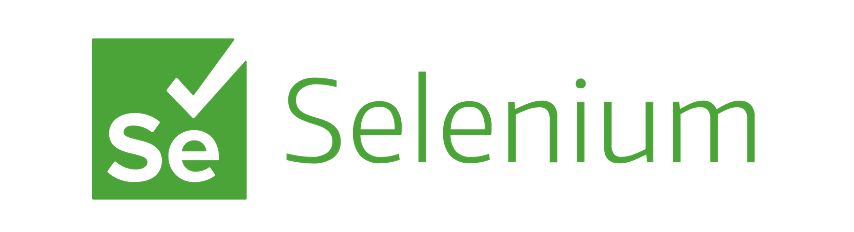

자동화 웹 어플리케이션 테스트를 위한 프레임워크입니다. Selenium은 다양한 언어를 지원하며, 웹 브라우저에서 작동하는 자동화 스크립트를 작성할 수 있습니다.

웹 애플리케이션을 제어할 수 있는 API를 제공합니다. 이를 사용하여 웹 페이지를 로드하고, 요소를 찾고, 클릭하고, 텍스트를 입력하고, 폼을 제출하는 등의 작업을 수행할 수 있습니다.

웹 페이지에 대한 자동화 테스트를 작성하기 위한 많은 유용한 기능들을 제공합니다. 
예를 들어, 웹 페이지가 로드되기를 기다리는 기능, 브라우저 창 크기를 변경하는 기능, 웹 페이지 스크롤링 기능 등이 있습니다.

크롤링과 같은 웹 스크래핑 작업에도 사용될 수 있습니다. 이를 통해, 예를 들어, 웹 사이트에서 정보를 수집하거나, 데이터를 추출하거나, 웹 페이지의 특정 정보를 모니터링하는 등의 작업을 수행할 수 있습니다.


In [1]:
pip install selenium==4.2.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service

import time
import os
import urllib, requests

In [3]:
!chmod +x chromedriver

In [4]:
#1. query 선언 / chromedriver 실행
query = "banana"
service = Service("./chromedriver")
driver = webdriver.Chrome(service=service)
driver.implicitly_wait(3)

#2. query 검색창에 추가
driver.get("https://www.google.co.kr/imghp?h1=ko")
keyword = driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea")
keyword.send_keys(query)
driver.implicitly_wait(3)

#3. 검색 실행
driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button").click()
driver.implicitly_wait(3)

#4. 스크롤 자동으로 내리기 / 더보기 버튼 클릭
print(f"{query}스크롤 내리는 중...")

#스크롤 동작을 위해 body정보를 elem에 담아준다
elem = driver.find_element_by_tag_name('body')

for i in range(120) :
    #스크롤 진행
    elem.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.1)

try :
    driver.find_element_by_class_name('mye4qd').send_keys(Keys.ENTER)
    for i in range(120):
        #더보기 클릭 후 스크롤 진행
        elem.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.1)
except :
    pass

#5. 이미지 개수 파악하기
links = []
images = driver.find_elements_by_css_selector('img.rg_i')
for image in images :
    
    if image.get_attribute('src') != None :
        links.append(image.get_attribute('src'))
    elif image.get_attribute('data-scr') != None :
        links.append(image.get_attribute('data-scr'))
    elif image.get_attribute('data-iurl') != None :
        links.append(image.get_attribute('data-iurl'))
        
print("찾은 이미지 개수 : ", len(links))

#6. 이미지 다운로드
count = 0
for i in links :
    start = time.time()
    url = i
    os.makedirs(f"./data/{query}_img_download/", exist_ok=True)
    while True :
        try :
            urllib.request.urlretrieve(url, f"./data/{query}_img_download/{str(count)}_{query}.png")
            print(f"{str(count)} / {str(len(links))} / {query} / 다운로드 시간 : {str(time.time() - start)} 초")
            break
        except urllib.error.HTTPError as e :
            print(f"HTTPError 발생 {e} : 재시동 중...")
            time.sleep(5)
        except Exception as e :
            print(f"Error 발생 {e} : 재시동 중...")
            time.sleep(5)
            
        if time.time() - start > 60 :
            print(f"{query} 이미지 다운로드 실패")
            break
    count = count + 1
    
print("다운로드 완료")
driver.close()

/var/folders/xb/wyxl_10n7rl1gpv6gysk7fn00000gn/T/ipykernel_6247/4008968102.py:9: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  keyword = driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea")
/var/folders/xb/wyxl_10n7rl1gpv6gysk7fn00000gn/T/ipykernel_6247/4008968102.py:14: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath("/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button").click()


banana스크롤 내리는 중...


/var/folders/xb/wyxl_10n7rl1gpv6gysk7fn00000gn/T/ipykernel_6247/4008968102.py:21: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead
  elem = driver.find_element_by_tag_name('body')
/var/folders/xb/wyxl_10n7rl1gpv6gysk7fn00000gn/T/ipykernel_6247/4008968102.py:29: DeprecationWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  driver.find_element_by_class_name('mye4qd').send_keys(Keys.ENTER)
/var/folders/xb/wyxl_10n7rl1gpv6gysk7fn00000gn/T/ipykernel_6247/4008968102.py:39: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  images = driver.find_elements_by_css_selector('img.rg_i')


찾은 이미지 개수 :  297
0 / 297 / banana / 다운로드 시간 : 0.003473043441772461 초
1 / 297 / banana / 다운로드 시간 : 0.00023293495178222656 초
2 / 297 / banana / 다운로드 시간 : 0.0002942085266113281 초
3 / 297 / banana / 다운로드 시간 : 0.00017499923706054688 초
4 / 297 / banana / 다운로드 시간 : 0.0001709461212158203 초
5 / 297 / banana / 다운로드 시간 : 0.0001430511474609375 초
6 / 297 / banana / 다운로드 시간 : 0.0001590251922607422 초
7 / 297 / banana / 다운로드 시간 : 0.0001468658447265625 초
8 / 297 / banana / 다운로드 시간 : 0.0001327991485595703 초
9 / 297 / banana / 다운로드 시간 : 0.0001418590545654297 초
10 / 297 / banana / 다운로드 시간 : 0.0002586841583251953 초
11 / 297 / banana / 다운로드 시간 : 0.00013899803161621094 초
12 / 297 / banana / 다운로드 시간 : 0.00014281272888183594 초
13 / 297 / banana / 다운로드 시간 : 0.0001270771026611328 초
14 / 297 / banana / 다운로드 시간 : 0.0001499652862548828 초
15 / 297 / banana / 다운로드 시간 : 0.00015687942504882812 초
16 / 297 / banana / 다운로드 시간 : 0.00021576881408691406 초
17 / 297 / banana / 다운로드 시간 : 0.00013303756713867188 초
18 / 297 / bana

157 / 297 / banana / 다운로드 시간 : 0.2022089958190918 초
158 / 297 / banana / 다운로드 시간 : 0.20508193969726562 초
159 / 297 / banana / 다운로드 시간 : 0.18720698356628418 초
160 / 297 / banana / 다운로드 시간 : 0.19558382034301758 초
161 / 297 / banana / 다운로드 시간 : 0.19975805282592773 초
162 / 297 / banana / 다운로드 시간 : 0.20415115356445312 초
163 / 297 / banana / 다운로드 시간 : 0.20059990882873535 초
164 / 297 / banana / 다운로드 시간 : 0.20888209342956543 초
165 / 297 / banana / 다운로드 시간 : 0.18532109260559082 초
166 / 297 / banana / 다운로드 시간 : 0.1752917766571045 초
167 / 297 / banana / 다운로드 시간 : 0.1942152976989746 초
168 / 297 / banana / 다운로드 시간 : 0.2346036434173584 초
169 / 297 / banana / 다운로드 시간 : 0.20502996444702148 초
170 / 297 / banana / 다운로드 시간 : 0.20523500442504883 초
171 / 297 / banana / 다운로드 시간 : 0.18761301040649414 초
172 / 297 / banana / 다운로드 시간 : 0.20294499397277832 초
173 / 297 / banana / 다운로드 시간 : 0.20401406288146973 초
174 / 297 / banana / 다운로드 시간 : 0.1759800910949707 초
175 / 297 / banana / 다운로드 시간 : 0.1843700408935547 초